In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
train = pd.read_csv('train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [70]:
train.shape

(200000, 202)

In [71]:
train.isnull().any().sum()

0

In [72]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [73]:
test = pd.read_csv('test.csv')
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [74]:
test.shape

(200000, 201)

In [75]:
test.isnull().any().sum()

0

In [76]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


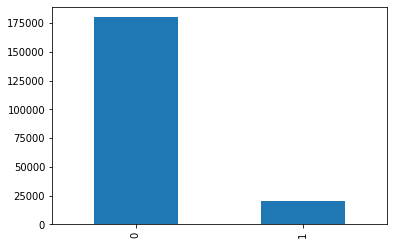

In [77]:
train['target'].value_counts().plot(kind = 'bar')

In [78]:
print('O class % is {}'.format((train['target'] == 0).sum()/len(train)))

O class % is 0.89951


In [79]:
newtrain = train.drop('ID_code', axis = 1)
newtest = test.drop('ID_code', axis = 1)

In [80]:
x_train = newtrain.drop('target', axis = 1)
y_train = newtrain['target']

In [81]:
x = newtrain.drop('target', axis = 1)
y = newtrain['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [82]:
from lightgbm import LGBMClassifier
lgm = LGBMClassifier()
lgm.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [83]:
y_pred = lgm.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [85]:
print(confusion_matrix(y_test, y_pred))

[[35984    60]
 [ 3577   379]]


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     36044
           1       0.86      0.10      0.17      3956

    accuracy                           0.91     40000
   macro avg       0.89      0.55      0.56     40000
weighted avg       0.91      0.91      0.87     40000



In [87]:
print(accuracy_score(y_test, y_pred))

0.909075


In [88]:
print(lgm.feature_importances_)
feat_importances = pd.Series(lgm.feature_importances_, index = x.columns)

[37 34 41  0  1 19 45  0  2 28  0  4 42 39  0  3  1  0 29  1  4 43 43 12
 12  0 41  0 11  0  0  9 18 43 31 26 24  0  0  0 35  0  0 18 32  4  0  0
 13 14  1 23 13 48  0  1 25  0  7  0  0  0  1  0  0  0  5 32  0  0  5 21
  0  0  1 30 37  1 33  0 46 29  9  4  0  7 22 22  7 25 11 29 38 17 43 25
  0  3  0 40  0  0  4  0  4  4 22 23 34 38 39 13 12  0 10 37  3  0 29 20
  0 32 31 34  0 15  0 21 14  0 18 18  7 36  2  9  0 13  3 45  0 23  1  0
  5 23 46 24 38 31 13 14  1  0 31 28  2 19  0  1  0  1 15 23 31 37 43 19
  3 40 36  0 22 26 48  3  0 25  0 30 24  0  0  0 33  0 10  2 23  0 38 35
 22  1  6 12  7 24 41 10]


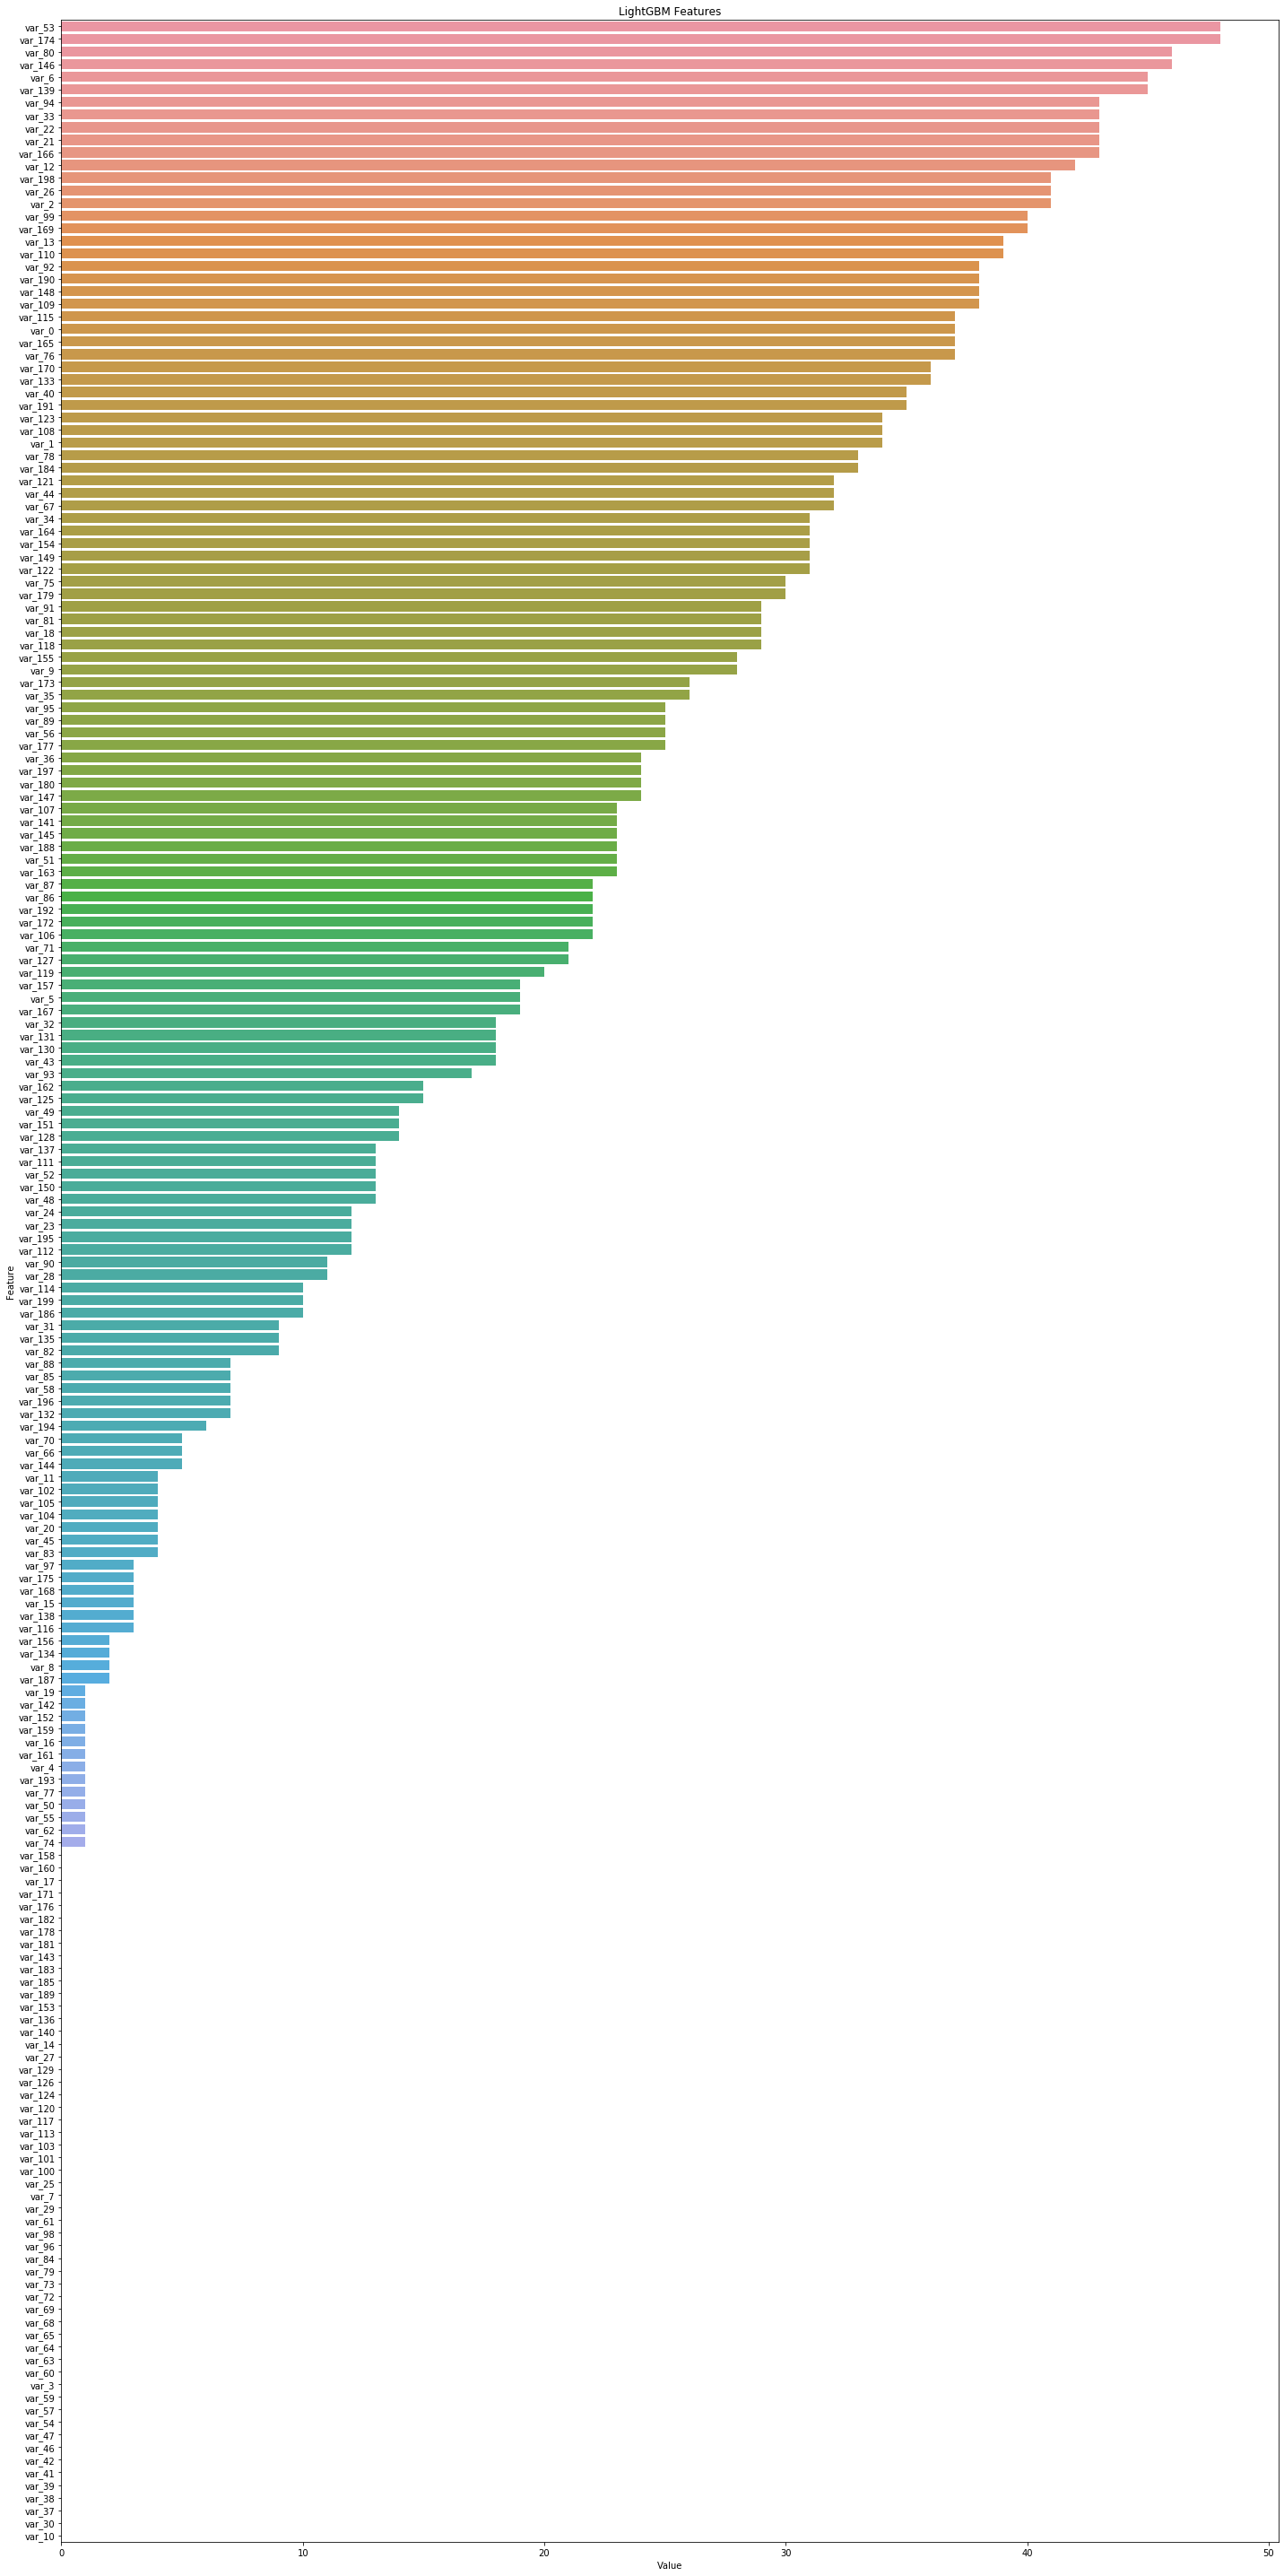

In [89]:
feature_imp = pd.DataFrame(sorted(zip(lgm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(20,40))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [90]:
feature_imp.loc[feature_imp.Value >= 0].sort_values(by=['Value'], ascending = False).head(50)

,Value,Feature
0,48,var_53
1,48,var_174
2,46,var_80
3,46,var_146
4,45,var_6
5,45,var_139
6,43,var_94
7,43,var_33
8,43,var_22
9,43,var_21


In [91]:
a = set(x.columns)

In [92]:
b = feature_imp.loc[feature_imp.Value >= 0].sort_values(by=['Value'], ascending = False).head(50)

In [93]:
c = set(b.Feature)

In [94]:
d = a - c

In [96]:
x_train = newtrain.drop(['target', 'var_10',
 'var_100',
 'var_101',
 'var_102',
 'var_103',
 'var_104',
 'var_105',
 'var_106',
 'var_107',
 'var_11',
 'var_111',
 'var_112',
 'var_113',
 'var_114',
 'var_116',
 'var_117',
 'var_119',
 'var_120',
 'var_124',
 'var_125',
 'var_126',
 'var_127',
 'var_128',
 'var_129',
 'var_130',
 'var_131',
 'var_132',
 'var_134',
 'var_135',
 'var_136',
 'var_137',
 'var_138',
 'var_14',
 'var_140',
 'var_141',
 'var_142',
 'var_143',
 'var_144',
 'var_145',
 'var_147',
 'var_15',
 'var_150',
 'var_151',
 'var_152',
 'var_153',
 'var_155',
 'var_156',
 'var_157',
 'var_158',
 'var_159',
 'var_16',
 'var_160',
 'var_161',
 'var_162',
 'var_163',
 'var_167',
 'var_168',
 'var_17',
 'var_171',
 'var_172',
 'var_173',
 'var_175',
 'var_176',
 'var_177',
 'var_178',
 'var_180',
 'var_181',
 'var_182',
 'var_183',
 'var_185',
 'var_186',
 'var_187',
 'var_188',
 'var_189',
 'var_19',
 'var_192',
 'var_193',
 'var_194',
 'var_195',
 'var_196',
 'var_197',
 'var_199',
 'var_20',
 'var_23',
 'var_24',
 'var_25',
 'var_27',
 'var_28',
 'var_29',
 'var_3',
 'var_30',
 'var_31',
 'var_32',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_4',
 'var_41',
 'var_42',
 'var_43',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_5',
 'var_50',
 'var_51',
 'var_52',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_68',
 'var_69',
 'var_7',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_77',
 'var_79',
 'var_8',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_9',
 'var_90',
 'var_93',
 'var_95',
 'var_96',
 'var_97',
 'var_98'], axis = 1)
y_train = newtrain['target']

In [97]:
x_test = newtest.drop(['var_10',
 'var_100',
 'var_101',
 'var_102',
 'var_103',
 'var_104',
 'var_105',
 'var_106',
 'var_107',
 'var_11',
 'var_111',
 'var_112',
 'var_113',
 'var_114',
 'var_116',
 'var_117',
 'var_119',
 'var_120',
 'var_124',
 'var_125',
 'var_126',
 'var_127',
 'var_128',
 'var_129',
 'var_130',
 'var_131',
 'var_132',
 'var_134',
 'var_135',
 'var_136',
 'var_137',
 'var_138',
 'var_14',
 'var_140',
 'var_141',
 'var_142',
 'var_143',
 'var_144',
 'var_145',
 'var_147',
 'var_15',
 'var_150',
 'var_151',
 'var_152',
 'var_153',
 'var_155',
 'var_156',
 'var_157',
 'var_158',
 'var_159',
 'var_16',
 'var_160',
 'var_161',
 'var_162',
 'var_163',
 'var_167',
 'var_168',
 'var_17',
 'var_171',
 'var_172',
 'var_173',
 'var_175',
 'var_176',
 'var_177',
 'var_178',
 'var_180',
 'var_181',
 'var_182',
 'var_183',
 'var_185',
 'var_186',
 'var_187',
 'var_188',
 'var_189',
 'var_19',
 'var_192',
 'var_193',
 'var_194',
 'var_195',
 'var_196',
 'var_197',
 'var_199',
 'var_20',
 'var_23',
 'var_24',
 'var_25',
 'var_27',
 'var_28',
 'var_29',
 'var_3',
 'var_30',
 'var_31',
 'var_32',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_4',
 'var_41',
 'var_42',
 'var_43',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_5',
 'var_50',
 'var_51',
 'var_52',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_68',
 'var_69',
 'var_7',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_77',
 'var_79',
 'var_8',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_9',
 'var_90',
 'var_93',
 'var_95',
 'var_96',
 'var_97',
 'var_98'], axis = 1)

In [98]:
x_train.shape

(200000, 50)

In [99]:
x_test.shape

(200000, 50)

In [100]:
from lightgbm import LGBMClassifier
lgm = LGBMClassifier()
y_pred = lgm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'ID_code': test.ID_code, 'target': y_pred})
solution.to_csv('Solution.csv', index = False)